In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

loading precomputed roc-auc

parse logfile

In [60]:
with open('logs/log_rna.txt') as f:
    log_info=f.readlines()
    
log_dict={}
for string in log_info:
    if string[:9]=='Arguments':
        task_name=string[string.index('experiment_name'):].split("'")[1]
        print(task_name)
        log_dict[task_name]={'train loss':[],'val loss':[],'test loss':[],
                             'train auc':[],'val auc':[],'test auc':[]}
    if string[:10]=='Loss Train':
        log_dict[task_name]['train loss'].append(float(string.split()[-1]))
    elif string[:8]=='Loss Val':
        log_dict[task_name]['val loss'].append(float(string.split()[-1]))
    elif string[:9]=='Loss Test':
        log_dict[task_name]['test loss'].append(float(string.split()[-1]))
    elif string[:13]=='ROC-AUC Train':
        log_dict[task_name]['train auc'].append(float(string.split()[-1]))
    elif string[:11]=='ROC-AUC Val':
        log_dict[task_name]['val auc'].append(float(string.split()[-1]))
    elif string[:12]=='ROC-AUC Test':
        log_dict[task_name]['test auc'].append(float(string.split()[-1]))

rna_site_atomnet_vmp
rna_npi_atomnet_vmp
rna_npi_atomnet_v
rna_npi_atomnet_mp
rna_npi_atomnet
rna_site_atomnet_mp
rna_site_atomnet_v
rna_site_atomnet


In [61]:
log_dict_site={}
ke=list(log_dict.keys())
ke.reverse()
for k in ke:
    if 'npi' not in k:
        log_dict_site[k]=log_dict.pop(k)

In [51]:
log_dict_site['dna_npi_atomnet_v_mp']=log_dict_site['npi_atomnet_v_mp_upd']
log_dict_site['dna_npi_atomnet_v']=log_dict_site['npi_atomnet_v_upd']
log_dict_site['dna_npi_atomnet_mp']=log_dict_site['npi_atomnet_mp']
log_dict_site['dna_npi_atomnet']=log_dict_site['npi_atomnet']
log_dict_site.pop('npi_atomnet_v_mp_upd')
log_dict_site.pop('npi_atomnet_v_upd')
log_dict_site.pop('npi_atomnet_v')
log_dict_site.pop('npi_atomnet_v_mp')
log_dict_site.pop('npi_atomnet_mp')
log_dict_site.pop('npi_atomnet')
log_dict=log_dict_site

In [62]:
d=pd.DataFrame(index=['train','val','test'])
ke=sorted(log_dict)
for k in ke:
    d[k]=[
    '{:.5f}'.format(max(log_dict[k]['train auc'])),
    '{:.5f}'.format(max(log_dict[k]['val auc'])),
    '{:.5f}'.format(log_dict[k]['test auc'][np.argmax(log_dict[k]['val auc'])])
    ]
    

In [63]:
d


,rna_npi_atomnet,rna_npi_atomnet_mp,rna_npi_atomnet_v,rna_npi_atomnet_vmp
train,0.71098,0.70544,0.70648,0.71226
val,0.68984,0.70239,0.70060,0.71493
test,0.71108,0.71818,0.71532,0.72097


show plots

In [54]:
colors=['red','blue','green','orange','purple','yellow', 'magenta', 'gray']

/home/domain/data/prog/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


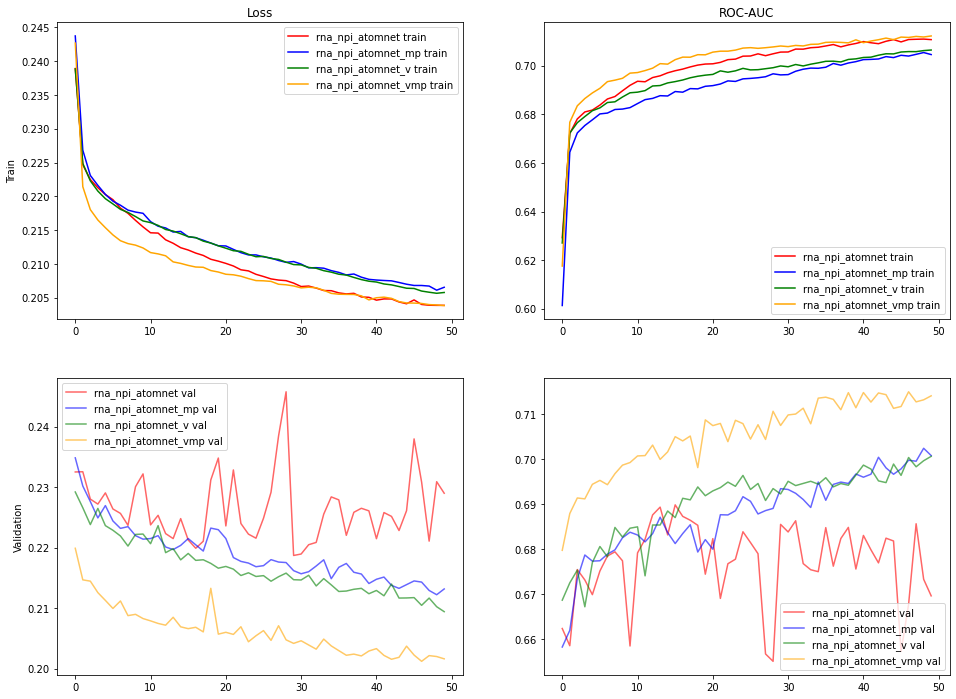

In [64]:
fig, ax=plt.subplots(2,2 , figsize=(16,12))
ax[0,0].set_title('Loss')
ax[0,0].set_ylabel('Train')
ax[1,0].set_ylabel('Validation')
ax[0,1].set_title('ROC-AUC')

for i, k in enumerate(sorted(log_dict)):
    ax[0,0].plot(log_dict[k]['train loss'], color=colors[i], alpha=1,label=k+' train')
    ax[1,0].plot(log_dict[k]['val loss'], color=colors[i], alpha=0.6,label=k+' val')
    #ax[0].plot(log_dict[k]['test loss'], color=colors[i], alpha=0.3,label=k+' test')
    ax[0,1].plot(log_dict[k]['train auc'], color=colors[i], alpha=1,label=k+' train')
    ax[1,1].plot(log_dict[k]['val auc'], color=colors[i], alpha=0.6,label=k+' val')
    #ax[1].plot(log_dict[k]['test auc'], color=colors[i], alpha=0.3,label=k+' test')  
ax[0,0].legend()
ax[1,0].legend()
ax[0,1].legend()
ax[1,1].legend()
fig.show()